In [1]:
# Let's classify IMBD movie reviews into positive and negative interviews using LSTMs in Keras

In [2]:
from keras.layers import LSTM, Embedding
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input, Bidirectional
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [3]:
print('Loading data...')
max_words = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words) # , skip_top=10)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [4]:
# monitor the loss, if the loss climbs instead of going down we stop the training
early_stopping=EarlyStopping(monitor='val_loss', patience=6)

In [5]:
print('Pad sequences (samples x time)')
maxlen = 400
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)


In [6]:
batch_size = 124
epochs = 10

print('Build model...')
model = Sequential()
model.add(Embedding(max_words, 50))  # 1000
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Build model...


In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1,
                    # validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 227s - loss: 0.5133 - acc: 0.7392 - val_loss: 0.4058 - val_acc: 0.8232
Epoch 2/10
22500/22500 [==============================] - 223s - loss: 0.3802 - acc: 0.8407 - val_loss: 0.4039 - val_acc: 0.8244
Epoch 3/10
22500/22500 [==============================] - 223s - loss: 0.3300 - acc: 0.8698 - val_loss: 0.3547 - val_acc: 0.8464
Epoch 4/10
22500/22500 [==============================] - 223s - loss: 0.4407 - acc: 0.8023 - val_loss: 0.3620 - val_acc: 0.8560
Epoch 5/10
22500/22500 [==============================] - 226s - loss: 0.3338 - acc: 0.8643 - val_loss: 0.3471 - val_acc: 0.8508
Epoch 6/10
22500/22500 [==============================] - 233s - loss: 0.2858 - acc: 0.8875 - val_loss: 0.3646 - val_acc: 0.8536
Epoch 7/10
22500/22500 [==============================] - 231s - loss: 0.2839 - acc: 0.8869 - val_loss: 0.3654 - val_acc: 0.8400
Epoch 8/10
22500/22500 [========================

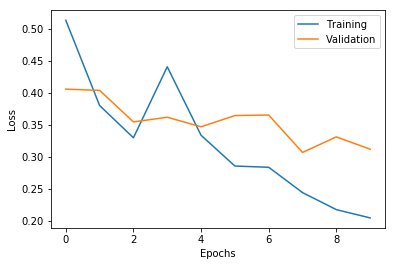

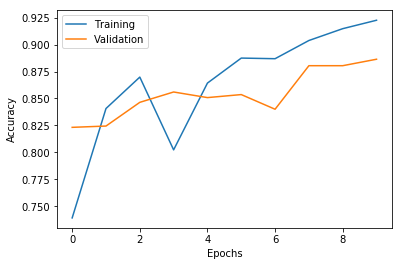

In [9]:
# inspect the model

from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(hist):
    plt.figure()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.legend(['Training', 'Validation'])
    # plt.savefig('loss.png', dpi=400)
    
    plt.figure()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.legend(['Training', 'Validation'])
    # plt.savefig('accuracy.png', dpi=400)
        
plot_history(history)

In [10]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 54s    
Test score: 0.325244666557
Test accuracy: 0.873919980755


In [11]:
# now let's use CNNs for this task
# the training time is much faster

In [12]:
from keras.preprocessing import sequence
from keras.layers import Dense, Dropout, Activation
from keras.layers import Convolution1D, GlobalMaxPooling1D

batch_size = 124
epochs = 10

max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
nb_filter = 250
filter_length = 3
hidden_dims = 250
nb_epoch = 4

model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen, dropout=0.2))


model.add(
    Convolution1D(
        nb_filter=nb_filter,
        filter_length=filter_length,
        border_mode='valid',
        activation='relu',
        subsample_length=1,
    )
)

model.add(GlobalMaxPooling1D())

model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))



J:\Anaconda_Python3_6\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
J:\Anaconda_Python3_6\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", strides=1, padding="valid", filters=250, kernel_size=3)`


In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1,
                    # validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 5s - loss: 0.3975 - acc: 0.8033 - val_loss: 0.2815 - val_acc: 0.8860
Epoch 2/10
22500/22500 [==============================] - 5s - loss: 0.2043 - acc: 0.9208 - val_loss: 0.2535 - val_acc: 0.8980
Epoch 3/10
22500/22500 [==============================] - 5s - loss: 0.1127 - acc: 0.9584 - val_loss: 0.2965 - val_acc: 0.8964
Epoch 4/10
22500/22500 [==============================] - 5s - loss: 0.0483 - acc: 0.9850 - val_loss: 0.3842 - val_acc: 0.8900
Epoch 5/10
22500/22500 [==============================] - 5s - loss: 0.0198 - acc: 0.9939 - val_loss: 0.4129 - val_acc: 0.8904
Epoch 6/10
22500/22500 [==============================] - 5s - loss: 0.0179 - acc: 0.9939 - val_loss: 0.6395 - val_acc: 0.8740
Epoch 7/10
22500/22500 [==============================] - 5s - loss: 0.0179 - acc: 0.9936 - val_loss: 0.5320 - val_acc: 0.8876
Epoch 8/10
22500/22500 [==============================] - 5s -

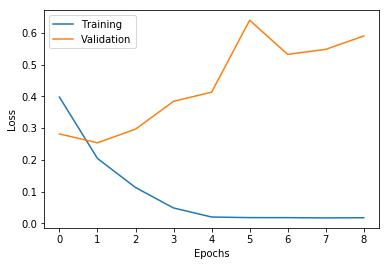

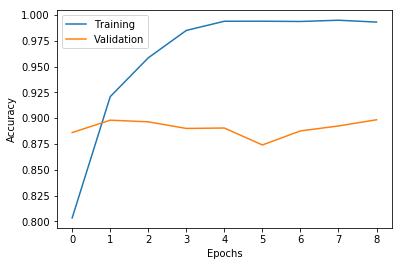

In [15]:
# inspect the model

from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(hist):
    plt.figure()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.legend(['Training', 'Validation'])
    # plt.savefig('loss.png', dpi=400)
    
    plt.figure()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.legend(['Training', 'Validation'])
    # plt.savefig('accuracy.png', dpi=400)
        
plot_history(history)

In [16]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

24672/25000 [============================>.] - ETA: 0sTest score: 0.632174825037
Test accuracy: 0.87932


In [ ]:
# Resources:
# http://www.samyzaf.com/ML/imdb/imdb.html
# https://medium.com/@thoszymkowiak/how-to-implement-sentiment-analysis-using-word-embedding-and-convolutional-neural-networks-on-keras-163197aef623